# Analisis EDA 

## Librerias

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Cargo los datos de siniestros viales de buenos aires

In [46]:
lesiones_df = pd.read_excel('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/lesiones.xlsx')

In [47]:
homicidios_df = pd.read_excel('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/homicidios.xlsx')

## Analizo las columnas y los datos que contienen 

### Lesiones

In [48]:
lesiones_df.sample(3)


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
6490,LC-2019-0487021,1,2019,8,6,2019-08-06 00:00:00,11:30:00,11,SD,11,...,-34.602024,SD,SD,SD-SD,x,SD,SD,SD,SD,SD
21583,LC-2021-0475551,2,2021,9,24,2021-09-24 00:00:00,16:15:00,16,ALMAFUERTE AV. y LOS PATOS,4,...,-34.640887838079,MOTO,MOTO,MOTO-MOTO,x,0,0,0,0,SD
21888,LC-2021-0512249,1,2021,10,7,2021-10-07 00:00:00,14:22:00,14,LINIERS VIRREY e INDEPENDENCIA AV.,5,...,-34.620750772449,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [49]:
lesiones_df.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [50]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [51]:
lesiones_df.describe()

,n_victimas,aaaa,mm,dd,altura
count,23785.000000,23785.000000,23785.000000,23785.000000,12771.000000
mean,1.160563,2019.901324,6.597561,15.616355,729.076345
std,0.551571,0.859432,3.476955,8.700047,1734.515099
min,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,1.000000,2019.000000,3.000000,8.000000,0.000000
50%,1.000000,2020.000000,7.000000,16.000000,0.000000
75%,1.000000,2021.000000,10.000000,23.000000,270.000000
max,16.000000,2021.000000,12.000000,31.000000,17700.000000


la columna latitud esta mal escrita

In [52]:
lesiones_df = lesiones_df.rename(columns={'latutid': 'latitud'})

las columnas latitud y longitud estan como obj, las voy a cambiar a float

In [53]:
lesiones_df['latitud'] = pd.to_numeric(lesiones_df['latitud'], errors='coerce')
lesiones_df['longitud'] = pd.to_numeric(lesiones_df['longitud'], errors='coerce')


la franja horaria tambien

In [54]:
lesiones_df['franja_hora'] = pd.to_numeric(lesiones_df['franja_hora'], errors='coerce')

In [55]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23776 non-null  float64
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

el primer problema que veo en este dataset es en la fecha y la hora, en la fecha quiere poner la hora al final de estas, y en la hora tienen 2 formatos distintos, algunos tiene el formato de 24hrs y otros el formato de 12hrs(AM/PM), para solucionar esto voy a transformar todos los horarios en formato 24hrs

In [56]:

def convert_to_24hrs(time_str):
    if 'p.m.' in time_str:
        hour, minute, second = map(int, time_str.replace(' p.m.', '').split(':'))
        return f'{hour % 12 + 12 if hour != 12 else hour}:{minute:02d}'
    elif 'a.m.' in time_str:
        hour, minute, second = map(int, time_str.replace(' a.m.', '').split(':'))
        return f'{hour % 12 if hour != 12 else 0}:{minute:02d}'
    else:
        return time_str[:5]  # Si ya está en formato de 24 horas, solo devuelve la hora y los minutos

# convierto 'hora' en cadena
lesiones_df['hora'] = lesiones_df['hora'].astype(str)
# Aplico la función 
lesiones_df['hora'] = lesiones_df['hora'].apply(convert_to_24hrs)


In [57]:
lesiones_df.sample(5)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
3879,LC-2019-0298365,1,2019,5,13,2019-05-13 00:00:00,16:47,16.0,SD,3,...,-34.603154,SD,SD,SD-SD,SD,SD,x,SD,SD,SD
9115,LC-2019-0704645,1,2019,11,8,2019-11-08 00:00:00,11:45,11.0,SD,9,...,-34.656140,SD,SD,SD-SD,SD,SD,SD,SD,x,SD
13498,LC-2020-0455885,1,2020,7,28,2020-07-28 00:00:00,14:40,14.0,"CALVO, CARLOS 1700",1,...,-34.620313,AUTO,AUTO,AUTO-AUTO,0,x,0,0,0,SD
14973,LC-2020-0603789,1,2020,11,9,2020-11-09 00:00:00,1:30,1.0,LUNA 342,4,...,-34.640037,SD,SD,SD-SD,0,0,0,0,0,SD
22776,LC-2021-0575099,1,2021,11,17,2021-11-17 00:00:00,16:30,16.0,BAHIA BLANCA y HABANA,11,...,-34.597410,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,SD


### Homicidios

In [58]:
homicidios_df.sample(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
203,2017-0076,1,2017-06-13,2017,6,13,14:50:00,14,AV. RAMON CASTILLO Y CALLE 12,AVENIDA,...,NaN,CALLE 12 (NO OFICIAL),"CASTILLO, RAMON S., PRES. AV. y CALLE 12 (NO O...",2,Point (107160.34141948 105678.38284277),-58.38526125,-34.57805810,PEATON-CARGAS,PEATON,CARGAS
658,2021-0060,1,2021-07-22,2021,7,22,12:30:00,12,"SALGUERO, JERONIMO Y RIVADAVIA AV.",AVENIDA,...,NaN,RIVADAVIA AV.,"SALGUERO, JERONIMO y RIVADAVIA AV.",5,Point (103997.04813615 102012.34139150),-58.41971993,-34.61112240,PEATON-PASAJEROS,PEATON,PASAJEROS
232,2017-0110,1,2017-09-06,2017,9,6,14:15:00,14,LAVALLE Y AV. LEANDRO N ALEM,AVENIDA,...,NaN,"ALEM, LEANDRO N. AV.","LAVALLE y ALEM, LEANDRO N. AV.",1,Point (108513.43549456 103032.95078343),-58.37048800,-34.60189492,PEATON-PASAJEROS,PEATON,PASAJEROS


In [59]:
homicidios_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [60]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [61]:
homicidios_df.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


## elimino duplicados 

In [62]:
lesiones_df = lesiones_df.drop_duplicates()

In [63]:
homicidios_df = homicidios_df.drop_duplicates()

## elimino nulos

In [64]:
lesiones_df = lesiones_df.dropna()

## Homicidios 

### Homicidios por mes de cada año

C:\Users\Facundete\AppData\Local\Temp\ipykernel_12620\888462552.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Mes', y='Número de homicidios', data=df_grafico, palette="rocket")


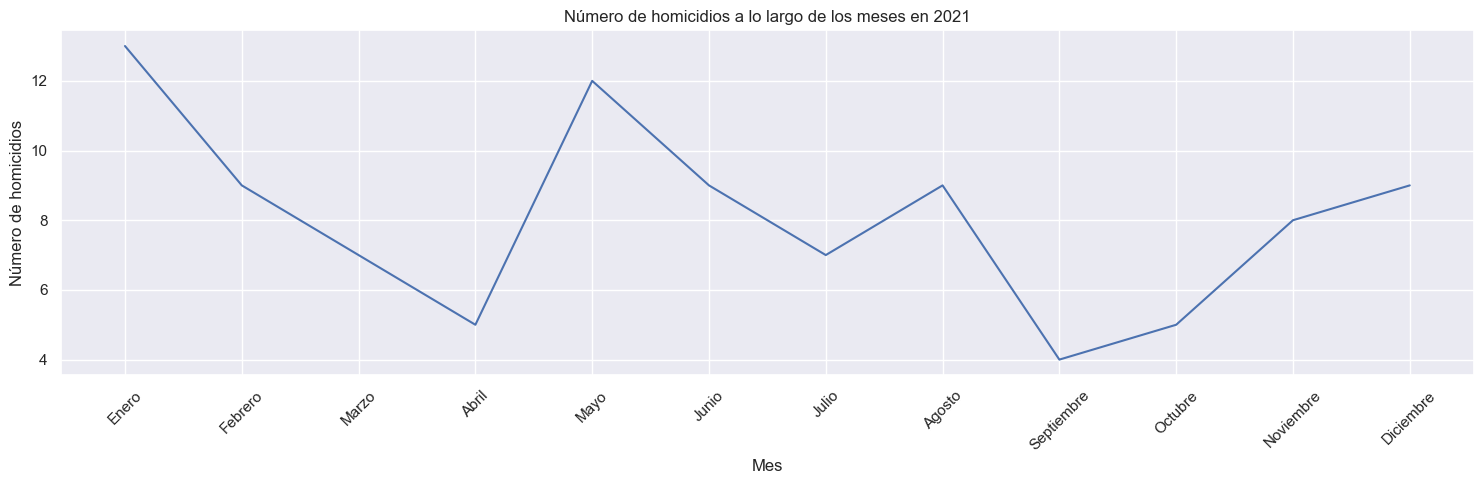

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

homicidios_df['FECHA'] = pd.to_datetime(homicidios_df['FECHA'])

# Extrae el año, el mes y el día de la fecha
homicidios_df['Año'] = homicidios_df['FECHA'].dt.year
homicidios_df['Mes'] = homicidios_df['FECHA'].dt.month

# Selecciona el año que deseas visualizar
# Desde 2016 hasta 2021
año_seleccionado = 2021

# Filtra los datos para incluir sólo los homicidios del año seleccionado
homicidios_año_seleccionado = homicidios_df[homicidios_df['Año'] == año_seleccionado]

# Cuenta el número de homicidios por mes
homicidios_por_mes = homicidios_año_seleccionado['Mes'].value_counts().sort_index()

# Crea un DataFrame con los datos para el gráfico
df_grafico = pd.DataFrame({
    'Mes': homicidios_por_mes.index,
    'Número de homicidios': homicidios_por_mes.values
})

# Establece el tamaño del gráfico
plt.figure(figsize=(15, 5))

# Crea el gráfico de línea
sns.lineplot(x='Mes', y='Número de homicidios', data=df_grafico, palette="rocket")

plt.xlabel('Mes')
plt.ylabel('Número de homicidios')
plt.title(f'Número de homicidios a lo largo de los meses en {año_seleccionado}')
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.tight_layout()
plt.show()


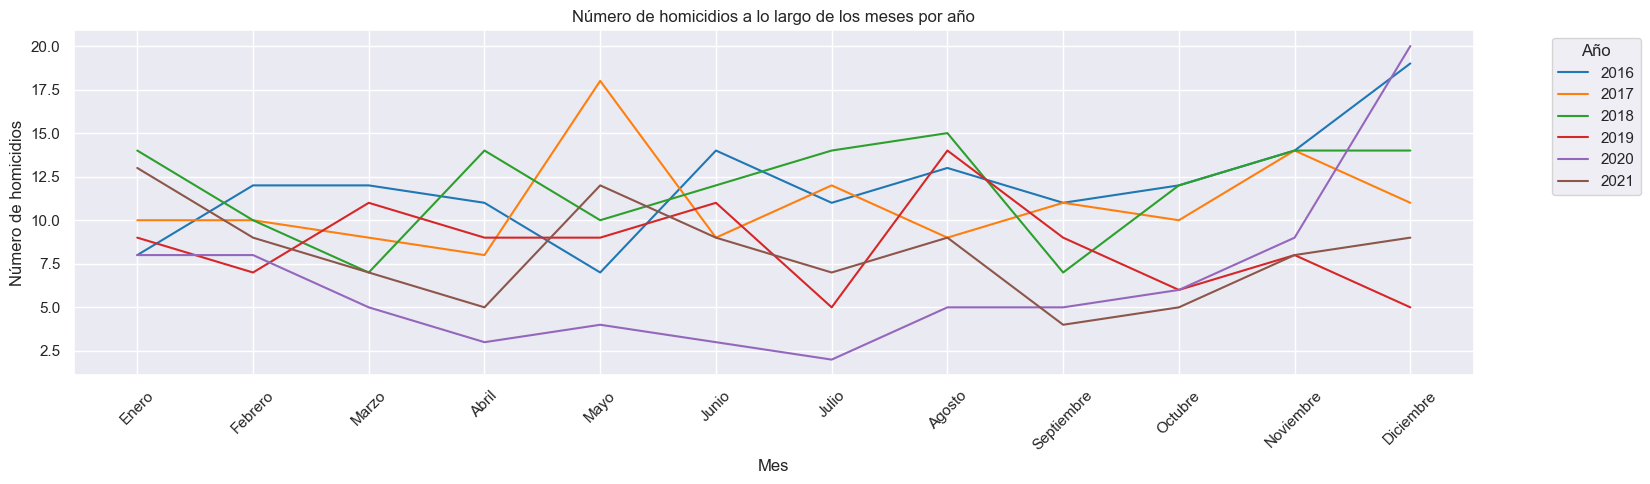

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

homicidios_df['FECHA'] = pd.to_datetime(homicidios_df['FECHA'])

# Extrae el año y el mes de la fecha
homicidios_df['Año'] = homicidios_df['FECHA'].dt.year
homicidios_df['Mes'] = homicidios_df['FECHA'].dt.month

# Crea un DataFrame vacío para almacenar los datos para el gráfico
df_grafico = pd.DataFrame()

# Para cada año en el DataFrame
for año in homicidios_df['Año'].unique():
    # Filtra los datos para incluir sólo los homicidios del año seleccionado
    homicidios_año_seleccionado = homicidios_df[homicidios_df['Año'] == año]

    # Cuenta el número de homicidios por mes
    homicidios_por_mes = homicidios_año_seleccionado['Mes'].value_counts().sort_index()

    # Crea un DataFrame temporal con los datos para el gráfico
    df_temp = pd.DataFrame({
        'Mes': homicidios_por_mes.index,
        'Número de homicidios': homicidios_por_mes.values,
        'Año': año
    })

    # Añade los datos del año al DataFrame del gráfico
    df_grafico = pd.concat([df_grafico, df_temp])

# Establece el tamaño del gráfico
plt.figure(figsize=(15, 5))

# Crea el gráfico de línea 
sns.lineplot(x='Mes', y='Número de homicidios', hue='Año', data=df_grafico, palette="tab10")

plt.xlabel('Mes')
plt.ylabel('Número de homicidios')
plt.title('Número de homicidios a lo largo de los meses por año')
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.tight_layout()

# Mueve la leyenda al exterior del gráfico en la parte superior
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


este grafico muestra la evolucion mensual que tienen los homicidios en los casos de siniestros viales a lo largo de cada año, cada linea de diferente color representa un año distinto, para poder distinguir mas facil las tendencias

luego en el dashboard tengo pensado que se pueda seleccionar el año y solo aparezcan las lineas seleccionadas

### mapa

In [67]:
homicidios_df = homicidios_df.rename(columns={'pos x': 'longitud', 'pos y': 'latitud'})

renombro las columnas pos x y pos y por latitud y longitud como esta nombrado en el otro dataset

In [68]:
import folium
from folium.plugins import HeatMap
import pandas as pd


# Convierte las columnas 'latitud' y 'longitud' a números
homicidios_df['latitud'] = pd.to_numeric(homicidios_df['latitud'], errors='coerce')
homicidios_df['longitud'] = pd.to_numeric(homicidios_df['longitud'], errors='coerce')

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[homicidios_df['latitud'].mean(), homicidios_df['longitud'].mean()], zoom_start=13)

# Prepara los datos para el HeatMap (una lista de listas, cada una con latitud y longitud)
data = homicidios_df[['latitud', 'longitud']].dropna().values.tolist()

# Añade el HeatMap al mapa
HeatMap(data).add_to(mapa)

# Muestra el mapa
mapa


se distingue muy poco el mapa asique voy a agrupar los puntos con un MarkerCluster

In [69]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Convierte las columnas 'latitud' y 'longitud' a números
homicidios_df['latitud'] = pd.to_numeric(homicidios_df['latitud'], errors='coerce')
homicidios_df['longitud'] = pd.to_numeric(homicidios_df['longitud'], errors='coerce')

# Elimina las filas con valores NaN en 'latitud' y 'longitud'
homicidios_df = homicidios_df.dropna(subset=['latitud', 'longitud'])

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[homicidios_df['latitud'].mean(), homicidios_df['longitud'].mean()], zoom_start=13)

# Crea un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Añade un marcador para cada punto al grupo de marcadores
for idx, row in homicidios_df.iterrows():
    folium.Marker(location=[row['latitud'], row['longitud']]).add_to(marker_cluster)

# Muestra el mapa
mapa


este mapa muestra la ubicacion exacta de los casos de homicidios en siniestros viales, estan agrupados para poder visualizar mas facilmente cuales son las zonas mas accidentadas

### grafico de barras

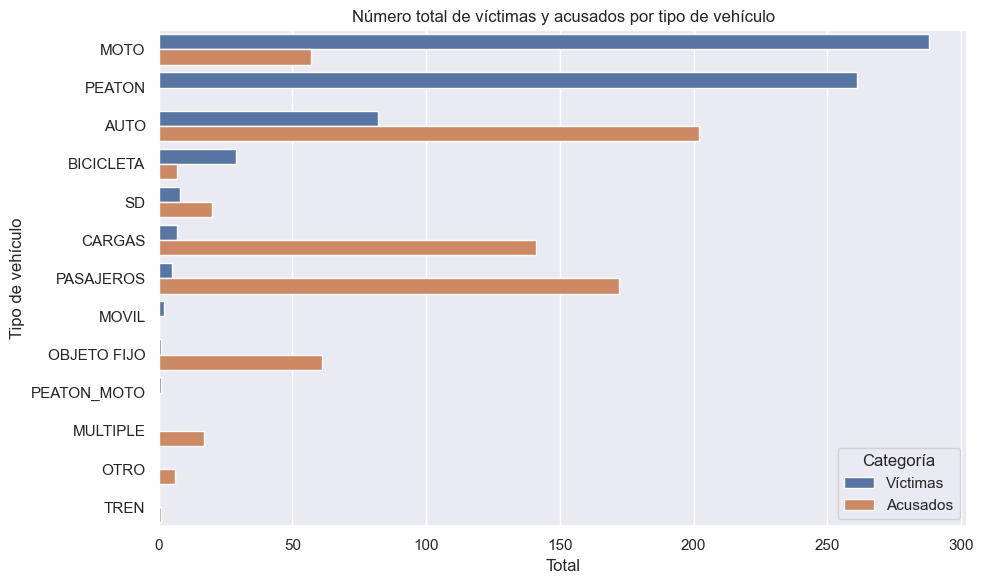

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cuenta el número total de víctimas y acusados por tipo de vehículo
total_victimas = homicidios_df['VICTIMA'].value_counts()
total_acusados = homicidios_df['ACUSADO'].value_counts()

# Crea un DataFrame con los datos para el gráfico
df_victimas = pd.DataFrame({
    'Tipo de vehículo': total_victimas.index,
    'Total': total_victimas.values,
    'Categoría': 'Víctimas'
})

df_acusados = pd.DataFrame({
    'Tipo de vehículo': total_acusados.index,
    'Total': total_acusados.values,
    'Categoría': 'Acusados'
})

df_grafico = pd.concat([df_victimas, df_acusados])

# Crea el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y='Tipo de vehículo', x='Total', hue='Categoría', data=df_grafico)

plt.ylabel('Tipo de vehículo')
plt.xlabel('Total')
plt.title('Número total de víctimas y acusados por tipo de vehículo')
plt.tight_layout()
plt.show()


se puede observar la distribucion de victimas y acusados por vehiculo

### Franja horaria

C:\Users\Facundete\AppData\Local\Temp\ipykernel_12620\3889908105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_df_filtrado['HH'] = pd.to_numeric(homicidios_df_filtrado['HH'])


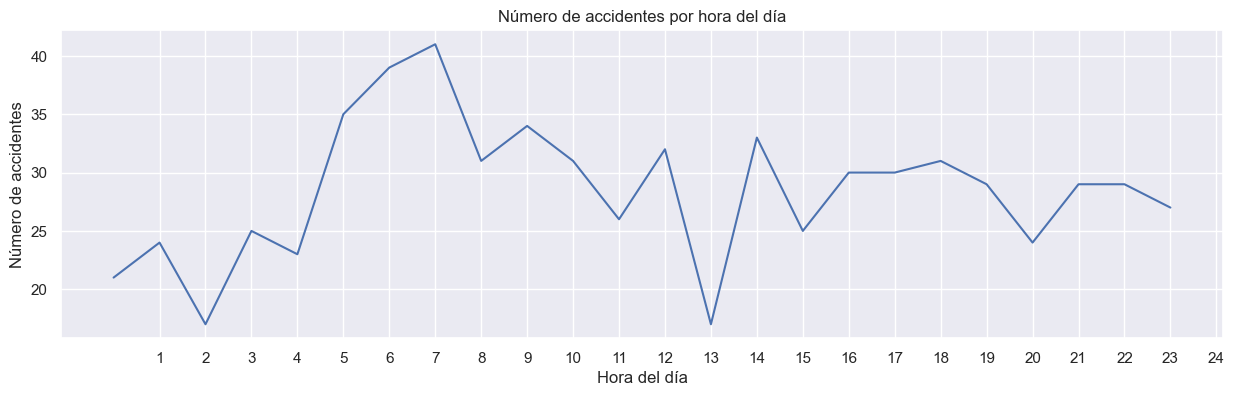

In [71]:
import matplotlib.pyplot as plt

# Filtra los datos para descartar las filas donde 'HH' es 'SD'
homicidios_df_filtrado = homicidios_df[homicidios_df['HH'] != 'SD']

# Asegúrate de que 'HH' es de tipo numérico
homicidios_df_filtrado['HH'] = pd.to_numeric(homicidios_df_filtrado['HH'])

# Agrupa los datos filtrados por la columna 'HH' y cuenta el número de accidentes
accidentes_por_hora = homicidios_df_filtrado.groupby('HH').size()

# Crea el gráfico de línea
plt.figure(figsize=(15, 4))
plt.plot(accidentes_por_hora.index, accidentes_por_hora.values)

# Personaliza las etiquetas del eje x para mostrar cada hora
plt.xticks(range(1, 25))

plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por hora del día')
plt.grid(True)
plt.show()


distribucion de accidentes fatales por horas del dia

## Lesiones

### mapa

voy a hacer un heatmap para ver la distribucion de las zonas donde se sufren los siniestros viales

In [72]:
import folium
from folium.plugins import HeatMap

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[lesiones_df['latitud'].mean(), lesiones_df['longitud'].mean()], zoom_start=13)

# Prepara los datos para el HeatMap (una lista de listas, cada una con latitud y longitud)
data = lesiones_df[['latitud', 'longitud']].values.tolist()

# Añade el HeatMap al mapa
HeatMap(data).add_to(mapa)

# Muestra el mapa
mapa


al tener demasiados puntos, el mapa no se puede distinguir bien, por esta razon voy a agrupar algunos puntos en el mapa

In [73]:
import folium
from folium.plugins import MarkerCluster

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[lesiones_df['latitud'].mean(), lesiones_df['longitud'].mean()], zoom_start=13)

# Crea un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Añade un marcador para cada punto al grupo de marcadores
for idx, row in lesiones_df.iterrows():
    folium.Marker(location=[row['latitud'], row['longitud']]).add_to(marker_cluster)

# Muestra el mapa
mapa


este es el mapa de lesiones, se puede apreciar mejor cuales son las zonas en el mapa con mas accidentes con lesiones no fatales 

### Grafico de barras de cantidad de accidentes no fatales por vehiculos 

C:\Users\Facundete\AppData\Local\Temp\ipykernel_12620\3230517426.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Tipo de vehículo', x='Número de accidentes', data=df_grafico, palette=sns.color_palette("flare"))
C:\Users\Facundete\AppData\Local\Temp\ipykernel_12620\3230517426.py:23: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(y='Tipo de vehículo', x='Número de accidentes', data=df_grafico, palette=sns.color_palette("flare"))


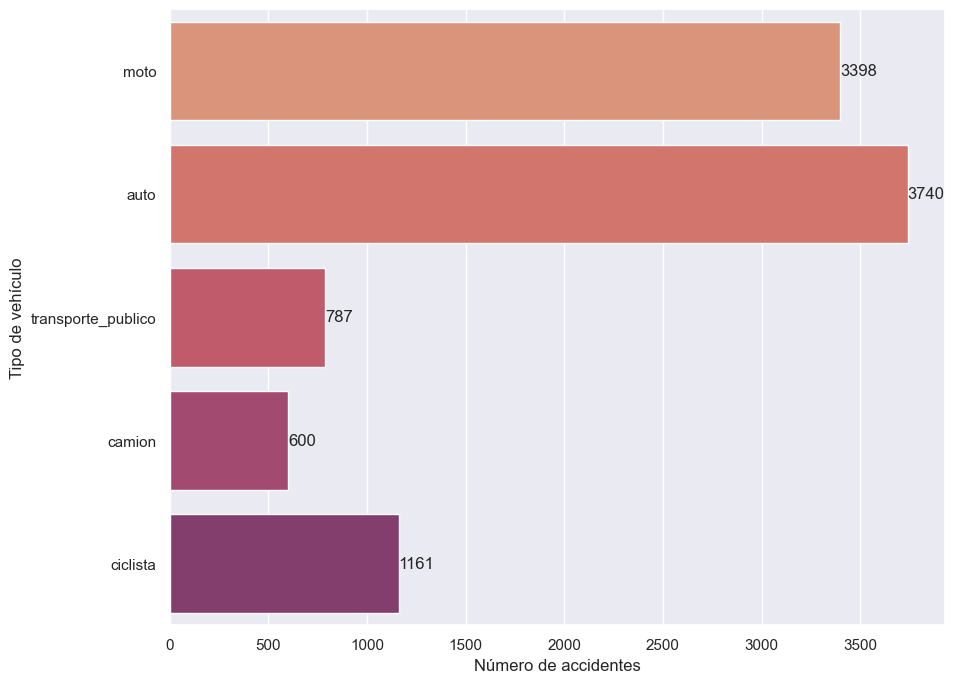

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establece el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Establece el tema de seaborn
sns.set_theme()

# Crea una lista con los nombres de las columnas de los vehículos
columnas_vehiculos = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']

# Cuenta el número de accidentes para cada tipo de vehículo
conteo_accidentes = [lesiones_df[col].str.contains('x').sum() for col in columnas_vehiculos]

# Crea un DataFrame con los datos para el gráfico
df_grafico = pd.DataFrame({
    'Tipo de vehículo': columnas_vehiculos,
    'Número de accidentes': conteo_accidentes
})

# Crea el gráfico de barras con seaborn
ax = sns.barplot(y='Tipo de vehículo', x='Número de accidentes', data=df_grafico, palette=sns.color_palette("flare"))

# Añade el número total en las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2, int(width), va='center')

plt.show()


en este grafico se ve cual es la relacion de accidentes que se tienen por vehiculos 

### Grafico accidentes no fatales por franja horaria

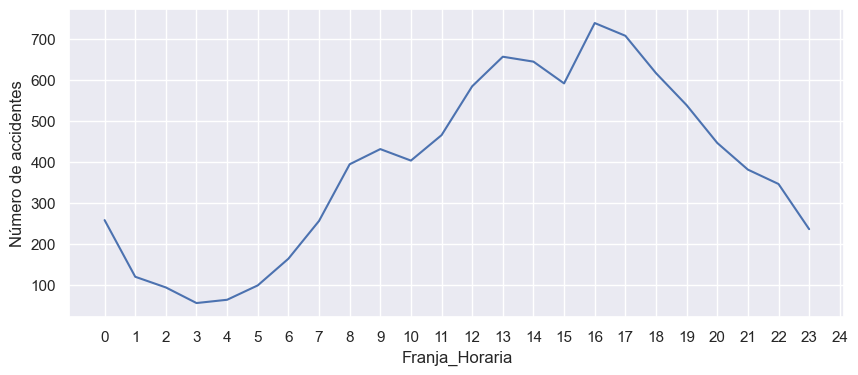

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convierte la columna 'franja_hora' a cadena
lesiones_df['franja_hora'] = lesiones_df['franja_hora'].astype(str)

# Extrae la hora de la columna 'franja_hora'
lesiones_df['hora'] = lesiones_df['franja_hora'].str.split('-').str[0]

# Cuenta el número de accidentes en cada hora
conteo_accidentes = lesiones_df['hora'].value_counts()

# Crea un DataFrame con los datos para el gráfico
df_grafico = pd.DataFrame({
    'Franja_Horaria': conteo_accidentes.index.astype(float).astype(int),  # Convierte a flotante y luego a entero
    'Número de accidentes': conteo_accidentes.values
})

# Ordena el DataFrame por 'Franja_Horaria'
df_grafico = df_grafico.sort_values('Franja_Horaria')

# Establece el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Crea el gráfico de línea con seaborn
sns.lineplot(x='Franja_Horaria', y='Número de accidentes', data=df_grafico)

# Personaliza las etiquetas del eje x para mostrar todas las horas
plt.xticks(range(0, 25))

plt.show()


# exportar

In [76]:
lesiones_df.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latitud', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [77]:
homicidios_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'longitud', 'latitud',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Año', 'Mes'],
      dtype='object')

In [78]:
# Cambia el nombre de las columnas a minúsculas
lesiones_df.columns = lesiones_df.columns.str.lower()
homicidios_df.columns = homicidios_df.columns.str.lower()

# Crea un mapeo de nombres de columnas para homogeneizar los nombres
column_mapping = {
    'id': 'id',
    'n_victimas': 'n_victimas',
    'aaaa': 'aaaa',
    'mm': 'mm',
    'dd': 'dd',
    'fecha': 'fecha',
    'hora': 'hora',
    'franja_hora': 'franja_hora',
    'direccion_normalizada': 'direccion_normalizada',
    'comuna': 'comuna',
    'tipo_calle': 'tipo_calle',
    'otra_direccion': 'otra_direccion',
    'calle': 'calle',
    'altura': 'altura',
    'cruce': 'cruce',
    'geocodificacion_caba': 'geocodificacion_caba',
    'longitud': 'longitud',
    'latitud': 'latitud',
    'victima': 'victima',
    'acusado': 'acusado',
    'participantes': 'participantes',
    'moto': 'moto',
    'auto': 'auto',
    'transporte_publico': 'transporte_publico',
    'camion': 'camion',
    'ciclista': 'ciclista',
    'gravedad': 'gravedad',
    'lugar_del_hecho': 'lugar_del_hecho',
    'hh': 'hh',
    'xy (caba)': 'xy_caba',
    'año': 'año',
    'mes': 'mes'
}

# Aplica el mapeo a los DataFrames
lesiones_df.rename(columns=column_mapping, inplace=True)
homicidios_df.rename(columns=column_mapping, inplace=True)


In [79]:
lesiones_df.sample(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
20072,LC-2021-0336436,1,2021,7,17,2021-07-17 00:00:00,1.0,1.0,"LUGONES, LEOPOLDO AV. y UDAONDO, GUILLERMO AV.",13,...,-34.543463,CAMIONETA,OBJETO FIJO,CAMIONETA-OBJETO FIJO,0,0,0,x,0,SD
22988,LC-2021-0593233,1,2021,11,28,2021-11-28 00:00:00,21.0,21.0,DEL LIBERTADOR AV. y LA PAMPA,13,...,-34.559539,PEATON,SD,PEATON-SD,SD,SD,SD,SD,SD,SD
20083,LC-2021-0337415,1,2021,7,17,2021-07-17 00:00:00,20.0,20.0,"CERVANTES y BEIRO, FRANCISCO AV.",11,...,-34.612068,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,SD


In [80]:
lesiones_df = lesiones_df.rename(columns={'franja_hora': 'hh'})

In [81]:
lesiones_df.sample(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,hh,direccion_normalizada,comuna,...,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
16481,LC-2021-0257201,1,2021,6,9,2021-06-09 00:00:00,15.0,15.0,GORRITI y GURRUCHAGA,14,...,-34.590004,CICLISTA,AUTO,CICLISTA-AUTO,0,x,0,0,x,SD
21857,LC-2021-0498508,2,2021,10,7,2021-10-07 00:00:00,8.0,8.0,COBO AV. y DOBLAS,7,...,-34.640650,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
13423,LC-2020-0446022,1,2020,7,21,2020-07-21 00:00:00,11.0,11.0,CORRIENTES AV. y JUNIN,3,...,-34.604533,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,SD


In [82]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9287 entries, 10073 to 23783
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9287 non-null   object 
 1   n_victimas             9287 non-null   int64  
 2   aaaa                   9287 non-null   int64  
 3   mm                     9287 non-null   int64  
 4   dd                     9287 non-null   int64  
 5   fecha                  9287 non-null   object 
 6   hora                   9287 non-null   object 
 7   hh                     9287 non-null   object 
 8   direccion_normalizada  9287 non-null   object 
 9   comuna                 9287 non-null   object 
 10  tipo_calle             9287 non-null   object 
 11  otra_direccion         9287 non-null   object 
 12  calle                  9287 non-null   object 
 13  altura                 9287 non-null   float64
 14  cruce                  9287 non-null   object 
 15  geoc

In [83]:
homicidios_df.sample(3)

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,dirección normalizada,comuna,xy_caba,longitud,latitud,participantes,victima,acusado,año,mes
541,2020-0021,1,2020-03-14,2020,3,14,16:50:00,16,"BRAVO, MARIO 1279",CALLE,...,"BRAVO, MARIO 1279",2,Point (104475.21054309 103813.59469342),-58.414516,-34.594883,PEATON-AUTO,PEATON,AUTO,2020,3
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,2021,12
354,2018-0080,1,2018-07-25,2018,7,25,22:22:00,22,"Alberdi, Juan Bautista Av. y Carhue",AVENIDA,...,"ALBERDI, JUAN BAUTISTA AV. y CARHUE",9,Point (95506.35959227 96696.89655626),-58.512322,-34.659035,PEATON-AUTO,PEATON,AUTO,2018,7


In [84]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 695
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     684 non-null    object        
 1   n_victimas             684 non-null    int64         
 2   fecha                  684 non-null    datetime64[ns]
 3   aaaa                   684 non-null    int64         
 4   mm                     684 non-null    int64         
 5   dd                     684 non-null    int64         
 6   hora                   684 non-null    object        
 7   hh                     684 non-null    object        
 8   lugar_del_hecho        684 non-null    object        
 9   tipo_de_calle          684 non-null    object        
 10  calle                  684 non-null    object        
 11  altura                 129 non-null    float64       
 12  cruce                  525 non-null    object        
 13  dirección 

In [85]:
# Agrega una nueva columna 'origen' a cada DataFrame
lesiones_df['origen'] = 'Lesiones'
homicidios_df['origen'] = 'Homicidios'

# Fusiona los DataFrames
df_combinado = pd.concat([lesiones_df, homicidios_df], ignore_index=True)


In [86]:
df_combinado.sample(10)

,id,n_victimas,aaaa,mm,dd,fecha,hora,hh,direccion_normalizada,comuna,...,camion,ciclista,gravedad,origen,lugar_del_hecho,tipo_de_calle,dirección normalizada,xy_caba,año,mes
6766,LC-2021-0337967,1,2021,7,18,2021-07-18 00:00:00,6.0,6.0,VIAMONTE y PASTEUR,3,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
7567,LC-2021-0447807,1,2021,9,9,2021-09-09 00:00:00,16.0,16.0,SARANDI e INDEPENDENCIA AV.,3,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
7806,LC-2021-0477627,1,2021,9,25,2021-09-25 00:00:00,23.0,23.0,ALMAFUERTE AV. y SAENZ AV.,4,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
1151,LC-2020-0101838,1,2020,2,16,2020-02-16 00:00:00,13.0,13.0,CONGRESO AV. y GALVAN,12,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
7547,LC-2021-0445814,1,2021,9,7,2021-09-07 00:00:00,14.0,14.0,"MORENO, PERITO AV. y FERNANDEZ DE LA CRUZ, F.,...",7,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
9633,2018-0081,1,2018,7,29,2018-07-29 00:00:00,06:30:00,6,NaN,7,...,NaN,NaN,NaN,Homicidios,Castañares Av. y Rivera Indarte Av.,AVENIDA,CASTAÃ‘ARES AV. y RIVERA INDARTE AV.,Point (101453.89687005 98180.39027169),2018.0,7.0
4926,LC-2021-0033221,2,2021,1,22,2021-01-22 00:00:00,21.0,21.0,NUEVA YORK y DE LOS CONSTITUYENTES AV.,15,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
5074,LC-2021-0060065,1,2021,2,9,2021-02-09 00:00:00,22.0,22.0,RIVADAVIA AV. y TREINTA Y TRES ORIENTALES,5,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
1176,LC-2020-0105545,1,2020,2,18,2020-02-18 00:00:00,9.0,9.0,"JUSTO, JUAN B. AV. y GUATEMALA",14,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
3236,LC-2020-0588144,1,2020,10,29,2020-10-29 00:00:00,17.0,17.0,"DIAZ, CESAR, GRAL. AV. y JUSTO, JUAN B. AV.",10,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_combinado['hh'] = df_combinado['hh'].astype(str).replace('\.0$', '', regex=True)
df_combinado['hora'] = df_combinado['hora'].astype(str).replace('\.0$', '', regex=True)


In [88]:
df_combinado.sample(10)

,id,n_victimas,aaaa,mm,dd,fecha,hora,hh,direccion_normalizada,comuna,...,camion,ciclista,gravedad,origen,lugar_del_hecho,tipo_de_calle,dirección normalizada,xy_caba,año,mes
736,LC-2020-0039313,1,2020,1,19,2020-01-19 00:00:00,17,17,TREJO NEMESIO y RENQUE CURA,10,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
6734,LC-2021-0334400,1,2021,7,15,2021-07-15 00:00:00,22,22,"ASUNCION y PAZ, MARCOS",11,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
7180,LC-2021-0404079,1,2021,8,13,2021-08-13 00:00:00,17,17,"MEMBRILLAR y BONIFACIO, JOSE",7,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
9059,LC-2021-0627683,1,2021,12,17,2021-12-17 00:00:00,8,8,"PAZ, GRAL. AV. y SANTO TOME",10,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
8754,LC-2021-0592739,1,2021,11,28,2021-11-28 00:00:00,9,9,CORRIENTES AV. y LARREA,3,...,x,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
1468,LC-2020-0150237,1,2020,3,8,2020-03-08 00:00:00,21,21,PUEYRREDON AV. y BERUTI,2,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
1477,LC-2020-0151195,5,2020,3,9,2020-03-09 00:00:00,11,11,"COSQUIN y RODO, JOSE E.",9,...,0,0,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
9037,LC-2021-0625599,1,2021,12,16,2021-12-16 00:00:00,8,8,PORTELA y VELAZQUEZ,7,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
4735,LC-2021-0003027,1,2021,1,4,2021-01-04 00:00:00,6,6,SANTA FE AV. y HUMBOLDT,14,...,0,0,GRAVE,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN
5791,LC-2021-0173228,6,2021,4,14,2021-04-14 00:00:00,16,16,"MARTINEZ CASTRO y BILBAO, FRANCISCO AV.",9,...,SD,SD,SD,Lesiones,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_combinado.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'hh',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_caba', 'longitud',
       'latitud', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad', 'origen',
       'lugar_del_hecho', 'tipo_de_calle', 'dirección normalizada', 'xy_caba',
       'año', 'mes'],
      dtype='object')

In [90]:
df_combinado.to_csv("data/homicidiosylesiones.csv", index=False)

In [91]:
lesiones_df.to_csv("data/lesiones.csv", index=False)

In [92]:
homicidios_df.to_csv("data/homicidios.csv", index=False)